## **Mục lục**
* **I. Giới thiệu** (Thực hiện 9:00 ngày 26/11/2025)
  * **1.1. Challenge**
  * **1.1. Giới thiệu bộ dữ liệu**
  * **1.1. Đặc trưng trong tập dữ liệu**
* **II. Xử lý dữ liệu** (Thực hiện 11:00 ngày 26/11/2025)
  * **2.1. Khai báo thư viện nạp và kiểm tra dữ liệu**
  * **2.2. Tiền xử lý dữ liệu**
    * *2.2.1. Xử lý dữ liệu bị thiếu ở cột Age bằng KNN*
    * *2.2.2. Xử lý dữ liệu bị thiếu ở cột Cabin bằng mode*
    * *2.2.3. Xử lý dữ liệu bị thiếu ở cột Embarked bằng "Missing*
* **III. Khám phá dữ liệu** (Thực hiện 19:00 ngày 26/11/2025)
  * **3.1. Dữ liệu dạng số liên tục**
  * **3.2. Dữ liệu dạng phân loại (bỏ cột Age, Cabin, Ticket)**
  * **2.3. Mối quan hệ giữa đặc trưng phân loại và biến số liên tục**
* **IV. Xây dựng mô hình** (Thực hiện 20:15 ngày 27/11/2025)
  * **4.1. Feature Engineering**
  * **4.2. Chuẩn hoá và chọn lọc đặc trưng**
  * **4.3. Lựa chọn mô hình cơ sở**
    * *4.3.1. Mô hình Logistic Regression*
    * *4.3.2. Mô hình Support Vector Machine (SVM)*
    * *4.3.3. Mô hình Random Forest*
    * *4.3.4. Mô hình XGBoost*
    * *4.3.5. Mô hình kết hợp*
  * **4.4. Tối ưu hóa siêu tham số và lựa chọn mô hình tốt nhất**
    * *4.4.1. Tối ưu hóa siêu tham số mô hình Random Forest*
    * *4.4.2. Tối ưu hóa siêu tham số mô hình XGBoost*
    * *4.4.3. Tối ưu hóa siêu tham số mô hình Voting Classifier*
    * *4.4.4. So sánh ba mô hình để tìm ra mô hình tối ưu nhất*
* **V. Kết quả và đánh giá** (Thực hiện 23:00 ngày 27/11/2025)
* **VI. Xuất file và nộp bài** (Thực hiện 23:33 ngày 27/11/2025)

### **I. Giới thiệu**


#### **1.1. Challenge**
Thảm họa Titanic là một trong những thảm họa lớn nhất trong lịch sử

Ngày 15 tháng 4 năm 1912 tàu RMS Titanic đã gặp nạn sau khi đã đâm vào một tảng băng chìm. Không may đã không có đủ phao cứu sinh cho những người trên thuyền, kết quả con số người chết có thể ước tính từ 1502 đến hơn 2224 hành khách và thuyền viên

Trong thử thách này ta sẽ xây dựng mô hình để trả lời cho câu hỏi
> Người như thế nào thì sẽ có khả năng sống sót cao hơn ?

Sử dụng dữ liệu hành khác gồm có các đặc trựng như (tên, tuổi, giới tính, hạng vé, ... )

#### **1.2. Giới thiệu về bộ dữ liệu (Dataset)**
Dữ liệu được chia thành các tập `train.csv` và `tsst.csv`

`Train.csv` lưu trữ thông tin của hành khách bất kể là họ còn sống hay không?. Tập này bao gồm thông tin của các hành khách để có thể huấn luyện mô hình dựa trên các đặc trưng đã cho trong tập hoặc có thể tạo mới một thuộc tính mời

`Test.csv` lưu trữ thông tin giống với tập train thực hiện việc đánh giá kiểm chứng hoạt động của mô hình (Tập này sẽ là tập để ta áp dụng và so sánh)

Sử dụng tập `train.csv` để có thể tìm chọn lọc đặc trưng và tập `test.csv` để dự đoán 418 hành khách còn lại xem họ có thể sống sót hay không

#### **1.3. Đặc trưng trong tập dữ liệu**
* **survival**: Sống sót (0 = Không sống sót, 1 = Sống sót)
* **pclass**: Hạng vé (1 = Hạng nhất, 2 = Hạng thường, 3 = Hạng thấp hơn)
* **sex**: Giới tính
* **age**: Tuổi của hành khách (nhỏ hơn 1 là trẻ em, hoặc trẻ sơ sinh)
* **sibsp**: Định nghĩa mối quan hệ trong gia đinh
  * Sibling: anh em chị em
  * Spouse: vợ chồng
* **parch**: Định nghĩa mối quan hệ giữa các hành khách
  * Parent: ba, mẹ
  * Child: con gái, con trai, em trai, em gái
  * Nhiều trẻ em theo chỉ 1 mình chúng, parch = 0 cho chúng
* **ticket**: Số vé
* **fare**
* **cabin:** Số cabin
* **embarked:** Cảng được đón (C = Cherbourg, Q = Queenstown, S = Southampton)

### **II. Xử lý dữ liệu**

#### **2.1. Khai báo thư viện nạp và kiểm tra dữ liệu**

In [162]:
# Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Nạp dữ liệu
train_df = pd.read_csv('train.csv', index_col='PassengerId') # Đặt PassengerId làm index
test_df = pd.read_csv('test.csv')

In [65]:
train_df.head() # Xuất 5 dòng đầu

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train_df.shape # Số dòng và cột

(891, 11)

In [67]:
train_df.info() # Kiểm tra kiểu dữ liệu số dòng của từng đặc trưng

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [68]:
train_df.isna().sum() # Kiểm tra giá trị bị thiếu trong tập huấn luyện

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [69]:
train_df.describe() # Tóm tắt thống kê với biến số liên tục

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
train_df.describe(include="object") # Tóm tắt thống kê với biến phân loại

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [71]:
for col in train_df.columns:
  print(train_df[col].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 8

##### **Nhận xét**
* Tập dữ liệu bao gồm 891 dòng tương đương với có 891 hành khách được lấy dữ liệu để thực hiện quá trình huấn luyện mô hình. Bên cạnh đó bộ dữ liệu bao gồm 11 đặc trưng tương ứng với số cột có trong tập dữ liệu
* Các cột mang kiểu dữ liệu:
  * Số liên tục: `Age`, `Parch`,`SibSp`, `Fare`
  * Phân loại: `Name`, `Sex`, `Survived`, `Cabin`, `Embarked`, `Ticket`
* **Các đặc trưng có dữ liệu bị thiếu bao gồm** `[Age, Cabin, Embarked]` các đặc trưng này cần phải được đánh giá phân tích xem chiếm bao nhiêu phần trăm trong toàn bộ mẫu dữ liệu trong tập từ đó có thể lựa chọn phương pháp để có thể thay thế dữ liệu bị thiếu đó
* Bên cạnh đó khi thống kê mô tả: Ta có thể quan sát từ bên phải chính là các giá trị thống kê, và trên cũng chính là tên các đặc trưng
  * **Age**: Trung bình từ độ tuổi 29, trẻ nhất là khoảng 0.4 năm tính theo tháng, lớn tuổi nhất à 80 tuổi  
  * **Fare**: Mức giá trung bình 32.20 thấp nhất là 0 đồng cao nhất là 512 đồng

#### **2.2. Tiền xử lý dữ liệu**

In [72]:
# Kiểm tra dữ liệu bị thiếu
ratio_missing_in_age_train = train_df['Age'].isna().sum() / train_df.shape[0] * 100
ratio_missing_in_cabin_train = train_df['Cabin'].isna().sum() / train_df.shape[0] * 100
ratio_missing_in_embraked_train = train_df['Embarked'].isna().sum() / train_df.shape[0] * 100

In [73]:
print('------------ Tỷ lệ dữ liệu bị thiếu ------------')
print(f'Tỷ lệ dữ liệu bị thiếu trong Age: {ratio_missing_in_age_train:.2f}%')
print(f'Tỷ lệ dữ liệu bị thiếu trong Cabin: {ratio_missing_in_cabin_train:.2f}%')
print(f'Tỷ lệ dữ liệu bị thiếu trong Embarked: {ratio_missing_in_embraked_train:.2f}%')

------------ Tỷ lệ dữ liệu bị thiếu ------------
Tỷ lệ dữ liệu bị thiếu trong Age: 19.87%
Tỷ lệ dữ liệu bị thiếu trong Cabin: 77.10%
Tỷ lệ dữ liệu bị thiếu trong Embarked: 0.22%


##### *2.2.1. Xử lý dữ liệu bị thiếu bằng KNN đối với cột Age*

In [74]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance') # Phân loại thành 5 nhóm và tính trọng số theo khoảng cách
train_df['Age'] = imputer.fit_transform(train_df[['Age']])

##### *2.2.2. Xử lý dữ liệu bị thiếu bằng giá trị mode cho Embarked*

In [75]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

##### *2.2.3. Xử lý dữ liệu bị thiếu bằng thay thế giá trị "Missing" đối với cột Cabin*

In [76]:
train_df['Cabin'] = train_df['Cabin'].fillna('Missing')

In [77]:
train_df.isna().sum() # Kiểm tra sau khi đã loại bỏ giá trị bị thiếu

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [78]:
# Đổi kiểu dữ liệu của một số cột không đúng giá trị
train_df['Pclass'] = train_df['Pclass'].astype('object')
train_df['Survived'] = train_df['Survived'].astype('object')
train_df['SibSp'] = train_df['SibSp'].astype('object')
train_df['Parch'] = train_df['Parch'].astype('object')

train_df.dtypes # Kiểm tra kiểu dữ liệu

,0
Survived,object
Pclass,object
Name,object
Sex,object
Age,float64
SibSp,object
Parch,object
Ticket,object
Fare,float64
Cabin,object


### **III. Khám phá dữ liệu**

#### **3.1. Dữ liệu dạng số liên tục**

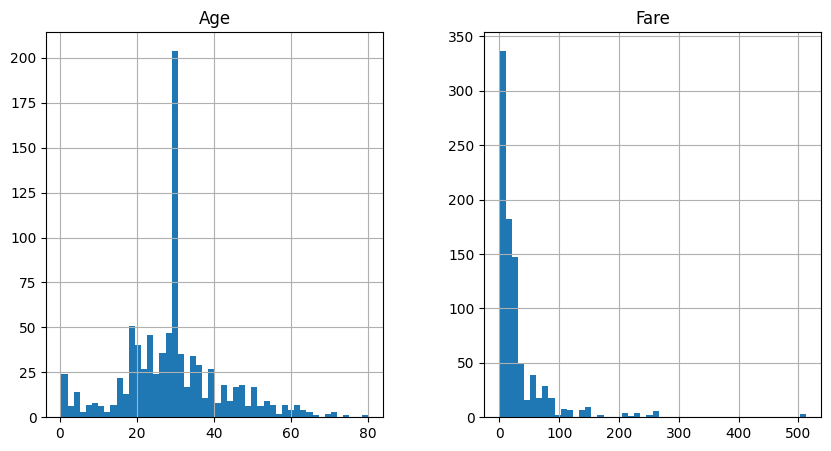

In [79]:
train_df.hist(bins=50, figsize=(10,5)) # Phân bố của dữ liệu dạng số liên tục
plt.show()

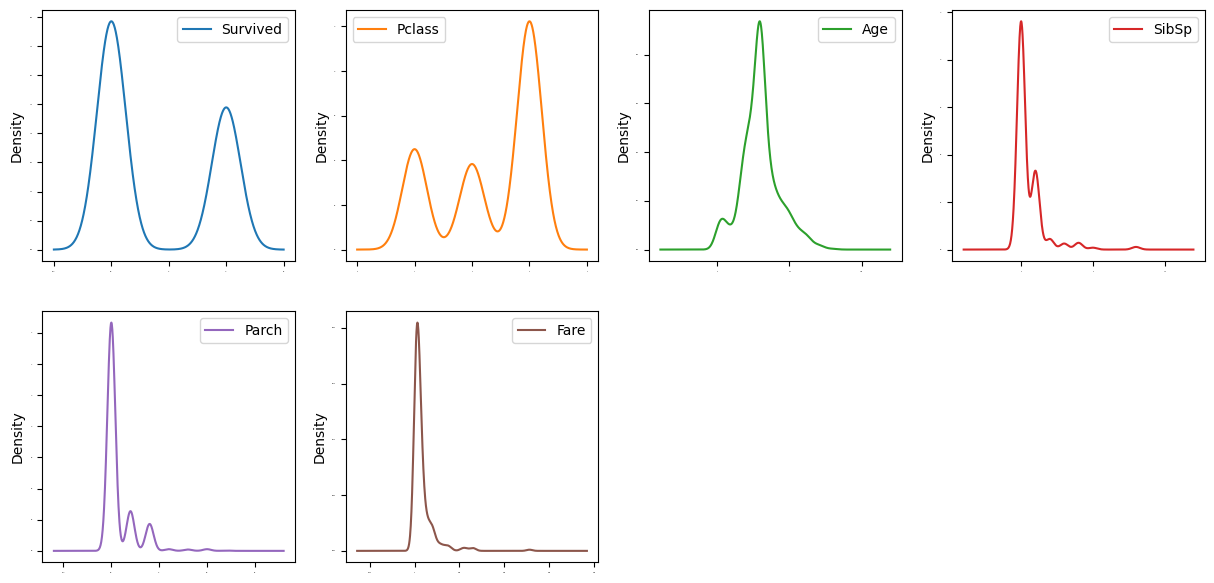

In [80]:
train_df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

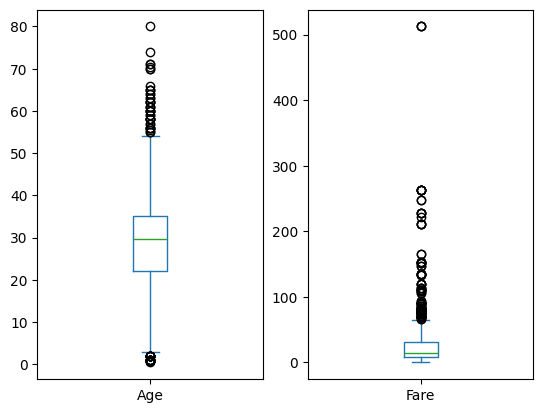

In [81]:
train_df.plot(kind='box', subplots=True, sharex=False, sharey=False) # Boxplot đánh giá dữ liệu số liên tục
plt.show()

###### **Nhận xét**
* Độ tuổi nhiều nhất xuất hiện trên thuyền là vào khoảng từ giữa 20 đến 40 tuổi cao nhất là khoảng 80 tuổi điều này cũng đúng đồng ý hoàn toàn với dữ liệu thực tế
* Gía vé cũng giao động trong khoảng từ 0 đến dưới 100 đồng cho thấy rằng đa số hành khách được vé miễn khá nhiều và giá cao nhất là 512 đồng điều này cũng cho thấy khá đúng so với dữ liệu thực tế
* Do vậy không cần thiết phải loại bỏ dữ liệu ngoại lai

#### **3.2. Dữ liệu dạng phân loại (Loại bỏ cột name, cabin, ticket)**

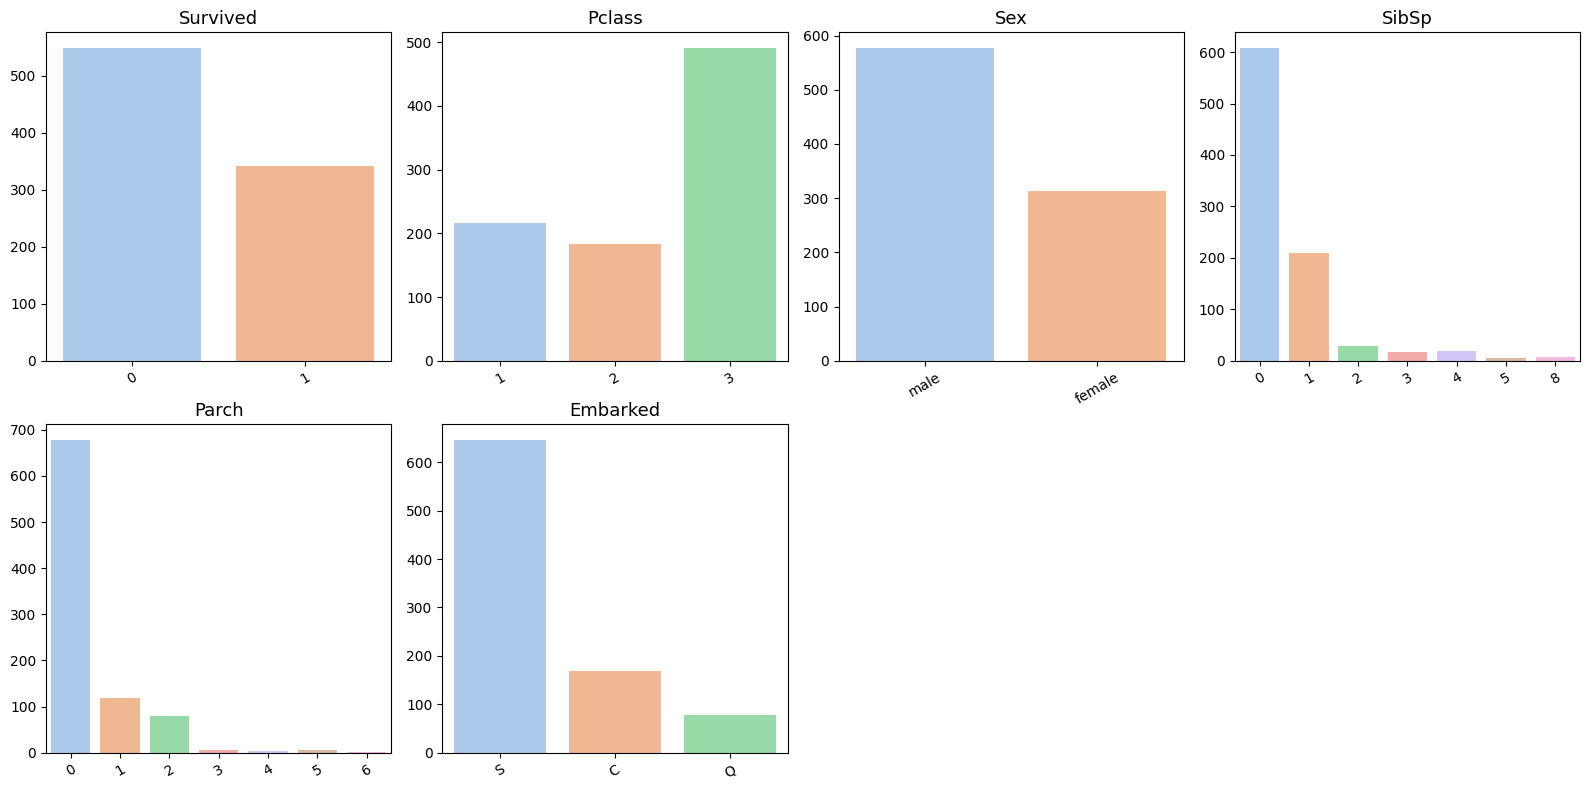

In [82]:
category_features = train_df.select_dtypes(include='object').columns.drop(['Name', 'Cabin', 'Ticket'])

# Tạo figure với số subplot phù hợp
n_cols = 4  # số cột mỗi hàng
n_rows = (len(category_features) + n_cols - 1) // n_cols  # tính số hàng

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # chuyển 2D array -> 1D để dễ duyệt

# Vẽ từng biểu đồ
for i, col in enumerate(category_features):
    sns.countplot(x=col, data=train_df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{col}', fontsize=13)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=30)

# Ẩn các ô trống nếu số cột < 4*n_rows
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

###### **Nhận xét**
* Tỷ lệ không sống sót chiếm phần lớn trong tập dữ liệu cũng như giới tính trong tập dữ liệu chiếm nhiều nhiếu nhất là Nam
* Các cảng mà tàu này đi qua đa số nằm ở Southamton là nhiều nhất
* Trong tập hành khách đa số là đi solo một mình là chủ yếu
* Hạng vé mà những hành khách này sử dụng khi lên tàu đa số là hạng vế thấp

#### **3.3. Mối quan hệ giữa đặc trưng phân loại và số liên tục**

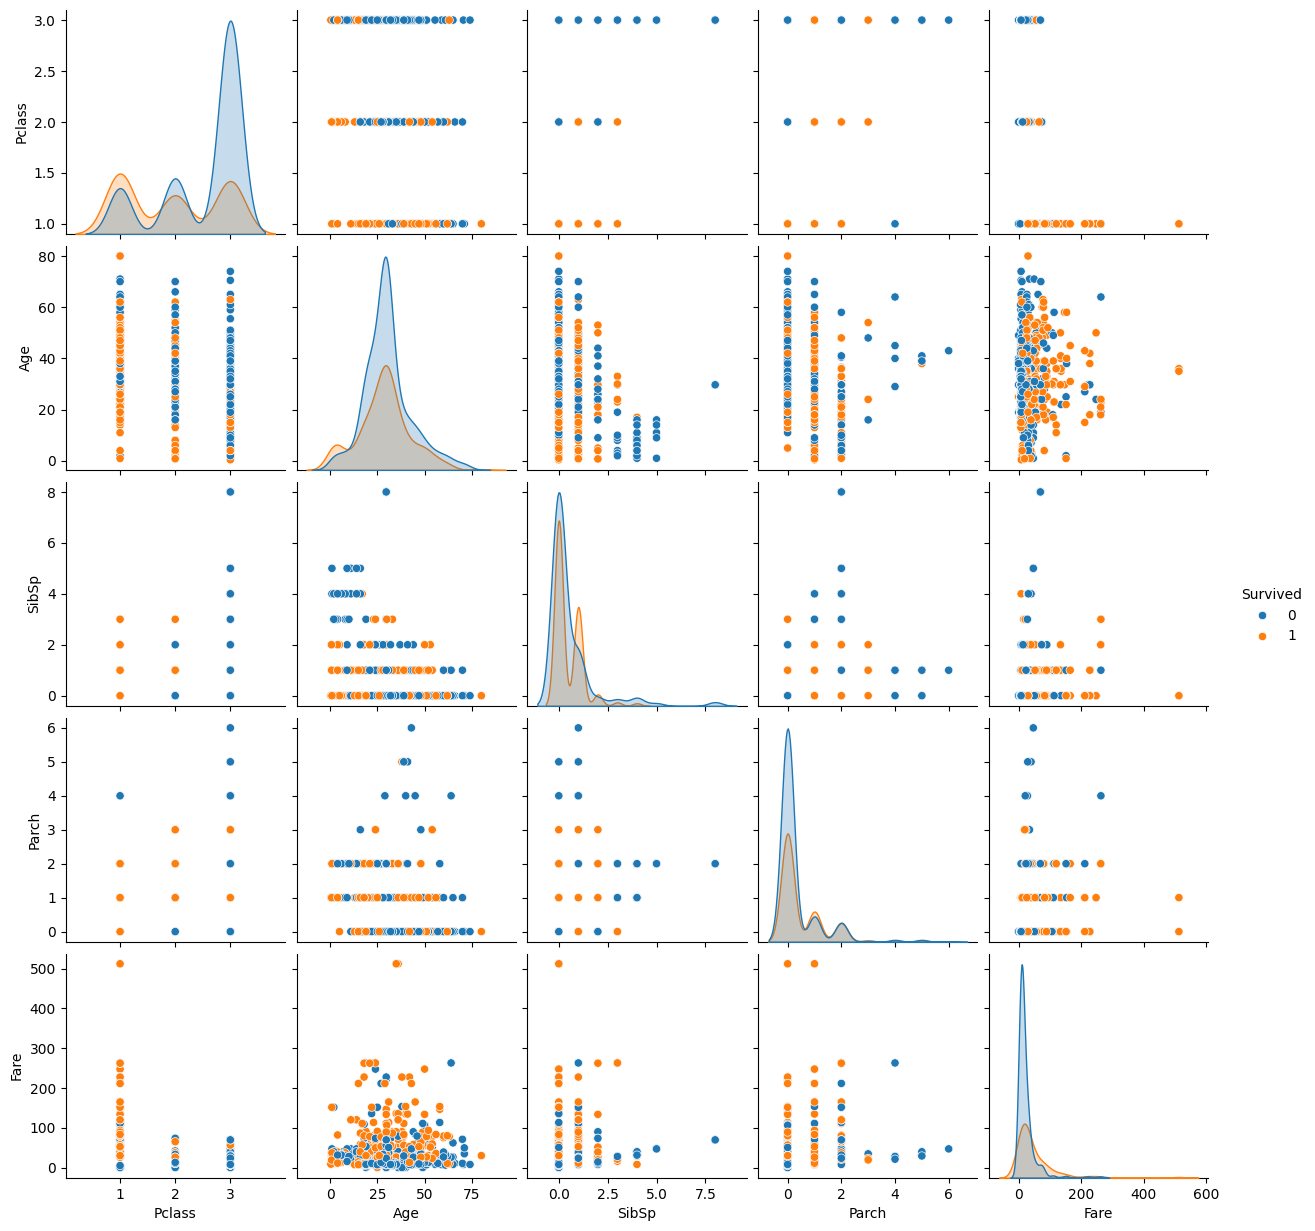

In [83]:
sns.pairplot(train_df, hue='Survived') # Đánh giá mối quan hệ giữa biến mục tiêu
plt.show()

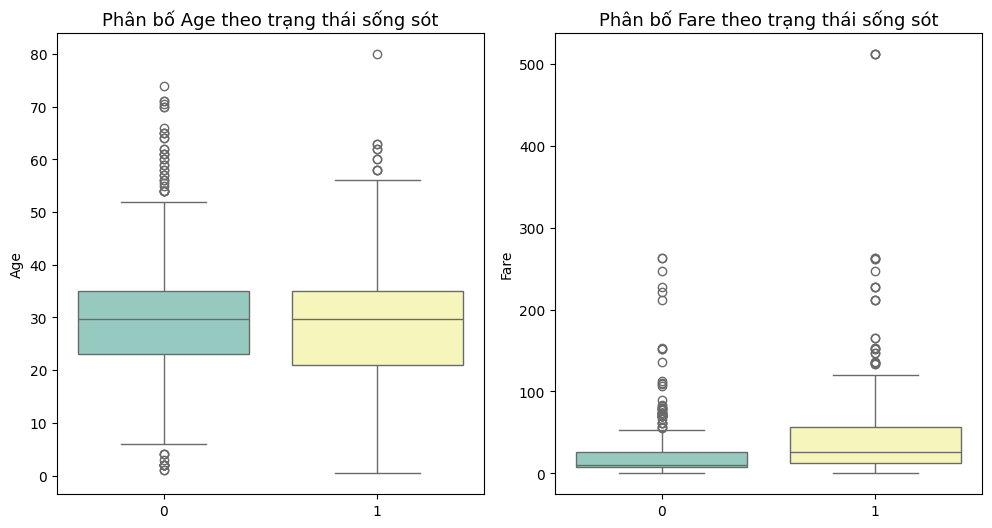

In [84]:
num_features = train_df.select_dtypes(include=['int64', 'float64']) # Biểu đồ boxplot đánh giá mối tương quan với biến mục tiêu

n_cols = 3
n_rows = (len(num_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(x='Survived', y=col, data=train_df, ax=axes[i], palette='Set3')
    axes[i].set_title(f'Phân bố {col} theo trạng thái sống sót', fontsize=13)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

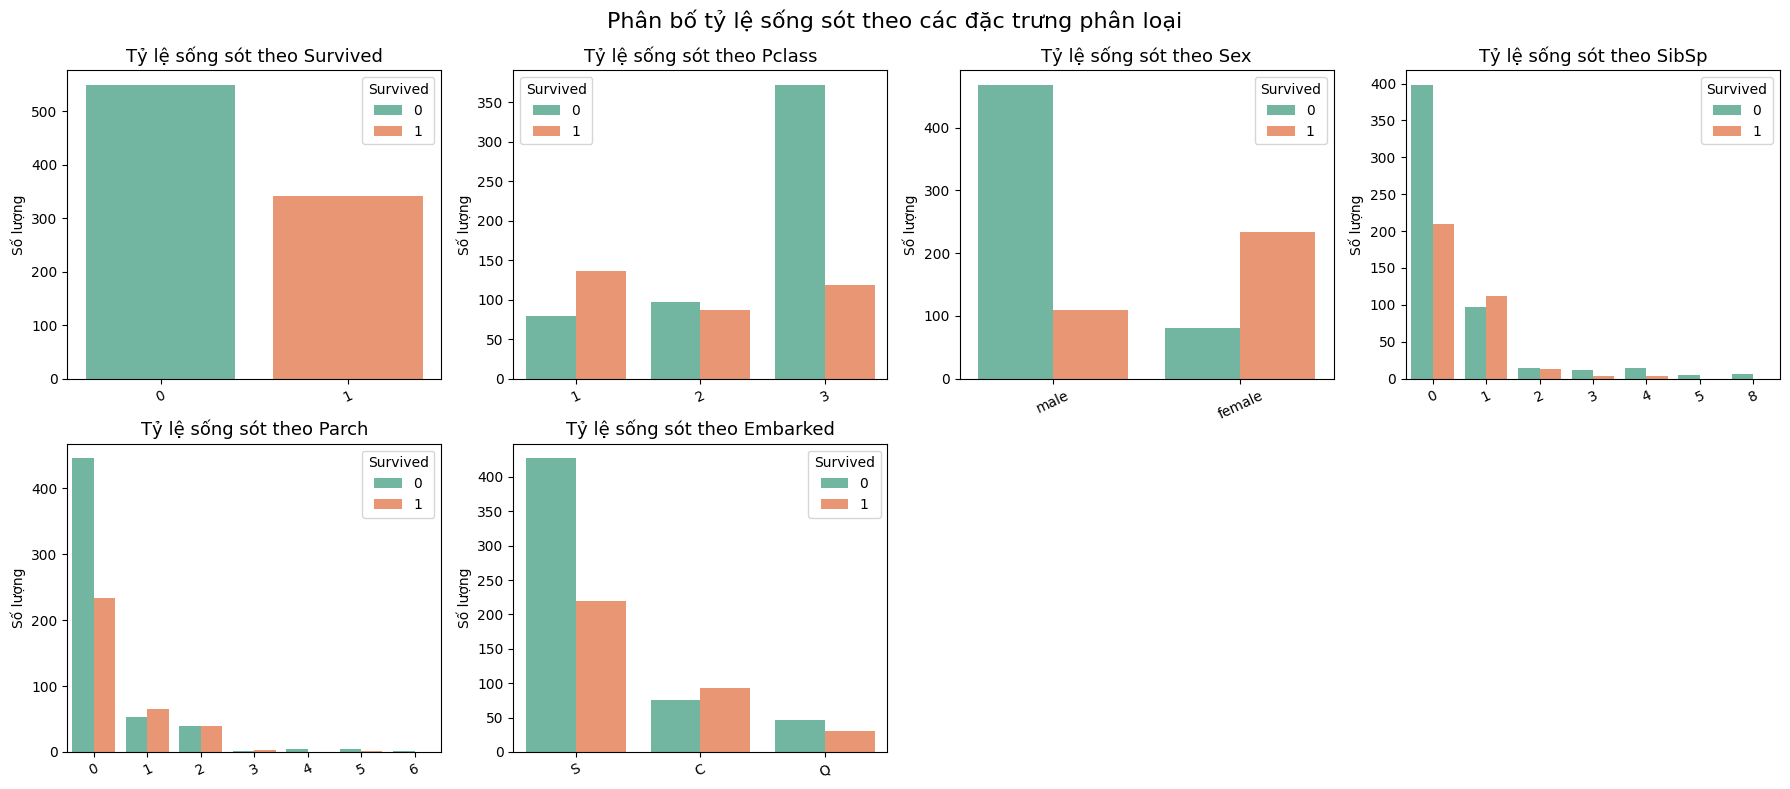

In [85]:
category_features = train_df.select_dtypes(include='object').columns.drop(['Name', 'Cabin', 'Ticket'], errors='ignore')

n_cols = 4
n_rows = (len(category_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(category_features):
    sns.countplot(x=col, hue='Survived', data=train_df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Tỷ lệ sống sót theo {col}', fontsize=13)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Số lượng')
    axes[i].tick_params(axis='x', rotation=25)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Phân bố tỷ lệ sống sót theo các đặc trưng phân loại", fontsize=16)
plt.tight_layout()
plt.show()

In [86]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

for col in category_features:
    print(f"{col}: {cramers_v(train_df[col], train_df['Survived']):.3f}")


Survived: 0.998
Pclass: 0.340
Sex: 0.541
SibSp: 0.205
Parch: 0.177
Embarked: 0.171


###### **Nhận xét**
* Đối với biểu đồ boxplot tỷ lệ hành khách sống sót nhỏ nhất từ hơn 1 tháng đến khoảng 60 tuổi, nhưng đáng tiếc đối với những hành khách không sống sót thì số lượng hành khách có độ tuổi dưới 1 năm cũng rất nhiều kể cả những người cao tuổi
* Với mức giá vé thì ta ó thể quan sát được những hành khách mua với giá vé cao thì có khả năng sống sót cao hơn
* Với đặc trưng phân loại ta có thể quan sát được bằng phương pháp Cramer V rằng điểm càng cao thì lại càng có mối quan hệ tương quan mạnh. Như giới tính, mức hạn vé

### **IV. Xây dựng mô hình**

#### **4.1. Feature Engineering**



In [87]:
# Tạo cột mới dựa theo name thể hiện chức danh của hành khách
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = train_df['Title'].replace(['Mlle','Ms'],'Miss')
train_df['Title'] = train_df['Title'].replace('Mme','Mrs')
train_df['Title'] = train_df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
# Kết hợp cột SibSp và Parch để đánh giá mức độ sống sót
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
# Tách cột Cabin thành chữ cái đầu để quan sát
train_df['Deck'] = train_df['Cabin'].str[0] # Với M sẽ là "Missing"
# Phân nhóm độ tuổi và mức thành giá vé
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4, labels=False)
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=False)
train_df.head() # Kiểm tra lại bảng dữ liệu


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Deck,FareBin,AgeBin
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,Mr,2,0,M,0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,C,3,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,Miss,1,1,M,1,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,C,3,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,Mr,1,1,M,1,2


#### **4.2. Chuẩn hóa và chọn lọc đặc trưng**

In [88]:
# Loại bỏ các cột không cần thiết
delete_col = ['Name', 'Ticket', 'Cabin']
train_df = train_df.drop(delete_col, axis=1)
train_df.head() # Kiểm tra lại các cột

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck,FareBin,AgeBin
PassengerId,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr,2,0,M,0,2
2,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0,C,3,2
3,1,3,female,26.0,0,0,7.9250,S,Miss,1,1,M,1,2
4,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0,C,3,2
5,0,3,male,35.0,0,0,8.0500,S,Mr,1,1,M,1,2


In [89]:
# Xây dựng pipeline để chuẩn hóa dữ liệu số liên tục và encoder dữ liệu phân loại
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Lựa chọn đặc trưng số và phân loại
num_features = ['Age', 'Fare', 'FamilySize', 'IsAlone']
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'FareBin', 'AgeBin']
# Pipeline cho dữ liệu số
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())          # chuẩn hóa
])
# Pipeline cho dữ liệu phân loại
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore')) # encoder
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ],
      remainder='passthrough'
    )

# Tách train_df thành x_train, y_train, x_test, y_test để tham gia huấn luyện và đánh gía
x_train, x_test, y_train, y_test = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], test_size=0.2, random_state=42)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

#### **4.3. Lựa chọn mô hình cơ sở**

##### *4.3.1. Mô hình Logistic Regression*

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lg_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

lg_clf.fit(x_train, y_train)
y_pred = lg_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[88 17]
 [18 56]]


##### *4.3.2. Mô hình Support Vector Machine (SVM)*

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42))
])

svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[92 13]
 [22 52]]


##### *4.3.3. Mô hình Random Forest*

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])

# Huấn luyện
rf_clf.fit(x_train, y_train)

# Dự đoán
y_pred = rf_clf.predict(x_test)

# Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
 [[90 15]
 [17 57]]


##### *4.3.4. Mô hình XGBoost*

In [100]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=300,       # số lượng cây
        learning_rate=0.05,     # tốc độ học
        max_depth=5,            # độ sâu cây
        subsample=0.8,          # tỉ lệ mẫu mỗi cây
        colsample_bytree=0.8,   # tỉ lệ cột mỗi cây
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'   # tránh warning
    ))
])

# Huấn luyện
xgb_clf.fit(x_train, y_train)

# Dự đoán
y_pred = xgb_clf.predict(x_test)

# Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
 [[91 14]
 [19 55]]


##### *4.3.5. Mô hình kết hợp*

In [103]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Các mô hình riêng
log_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_clf = XGBClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=5,
    subsample=0.8, colsample_bytree=0.8, random_state=42,
    use_label_encoder=False, eval_metric='logloss'
)

# Kết hợp voting (soft = dùng xác suất trung bình)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# Pipeline chung gồm tiền xử lý và ensemble
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('voting', voting_clf)
])

# Huấn luyện
final_model.fit(x_train, y_train)

# Dự đoán
y_pred = final_model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



###### **Nhận xét**
* Qua 5 mô hình phân loại tỷ lệ sống sót thì ta có thể thẩy rằng:
  * Các mô hình đều có độ chính xác (Accuracy) nằm trong khoảng 80 đến 82
  * Nổi bật nhất là 3 mô hình:
    * Random Forest: **82%**
    * XGBoost: **82%**
    * Mô hình kết hợp Voting Classifier: **82%**
* Vì thế ta sẽ quyết định chọn 3 mô hình này để tối ưu tham số để tìm ra tham số tối ưu để có thể lựa chọn ra mô hình tốt nhất để huấn luyện tập test. Và nộp submittion

#### **4.4. Tối ưu hóa tham số và lựa chọn ra mô hình tốt nhất**

##### *4.4.1. Tối ưu hóa siêu tham số mô hình Random Forest*

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Mô hình pipeline
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Lưới tham số cần thử
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search_rf = GridSearchCV(
    rf_pipe, param_grid,
    cv=5, n_jobs=-1,
    scoring='accuracy'
)
grid_search_rf.fit(x_train, y_train)

print("Best Parameters for Random Forest:")
print(grid_search_rf.best_params_)
print("Best CV Accuracy:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_


Best Parameters for Random Forest:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best CV Accuracy: 0.8356446370530877


##### *4.4.2. Tối ưu hóa siêu tham số mô hình XGBoost*

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

param_dist = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    xgb_pipe,
    param_distributions=param_dist,
    n_iter=10, cv=5, n_jobs=-1,
    scoring='accuracy',
    random_state=42
)
random_search_xgb.fit(x_train, y_train)

print("Best Parameters for XGBoost:")
print(random_search_xgb.best_params_)
print("Best CV Accuracy:", random_search_xgb.best_score_)


Best Parameters for XGBoost:
{'classifier__subsample': 0.7, 'classifier__n_estimators': 500, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.7}
Best CV Accuracy: 0.8412784398699891


##### *4.4.3. Tối ưu hóa siêu tham số mô hình Voting Classifier*

In [113]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

voting_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('voting', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000, random_state=42)),
            ('rf', best_rf.named_steps['classifier']),
            ('xgb', random_search_xgb.best_estimator_.named_steps['classifier'])
        ],
        voting='soft'
    ))
])

voting_best.fit(x_train, y_train)
y_pred = voting_best.predict(x_test)

from sklearn.metrics import accuracy_score
print("Voting Ensemble Accuracy:", accuracy_score(y_test, y_pred))


Voting Ensemble Accuracy: 0.8212290502793296


##### *4.4.4. So sánh ba mô hình để tìm ra mô hình tối ưu nhất*

In [114]:
models = {
    'Random Forest (tuned)': best_rf,
    'XGBoost (tuned)': random_search_xgb.best_estimator_,
    'Voting (tuned)': voting_best
}

from sklearn.metrics import accuracy_score

results = {}
for name, model in models.items():
    y_pred = model.predict(x_test)
    results[name] = accuracy_score(y_test, y_pred)

import pandas as pd
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print(results_df)


                   Model  Accuracy
0  Random Forest (tuned)  0.815642
1        XGBoost (tuned)  0.837989
2         Voting (tuned)  0.821229


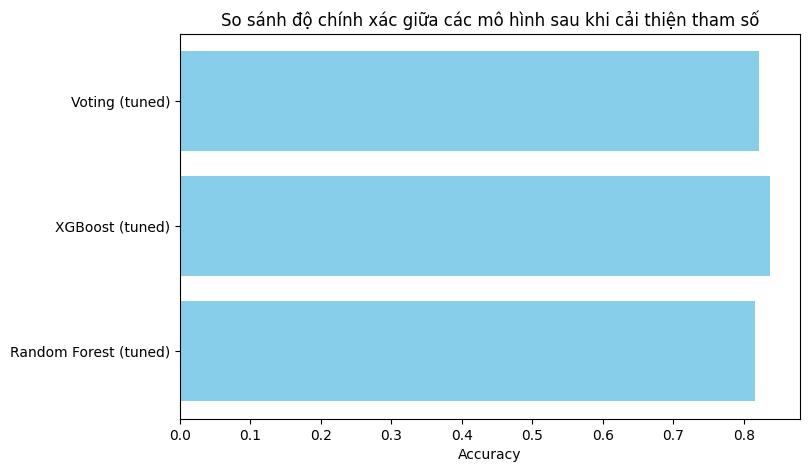

In [116]:
# Trực quan hóa độ chính xác mô hình
plt.figure(figsize=(8,5))
plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('So sánh độ chính xác giữa các mô hình sau khi cải thiện tham số')
plt.show()

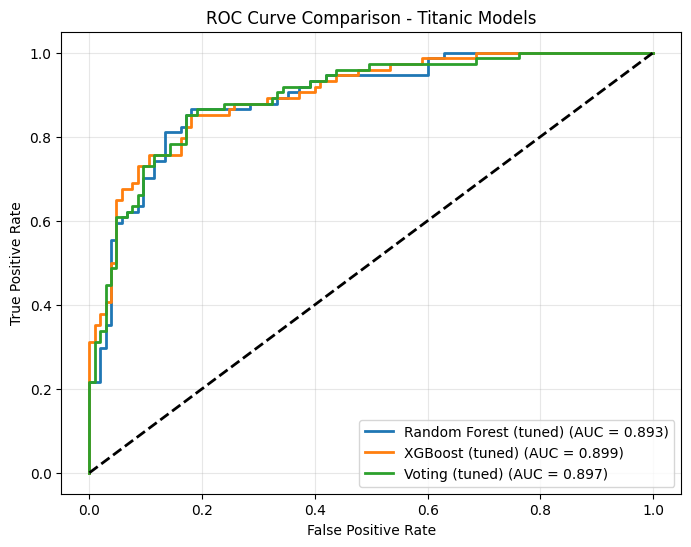

In [121]:
# Vẽ đường AUC nhằm tránh gây overfitting cũng như lựa chọn mô hình tối ưu
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

models = {
    'Random Forest (tuned)': best_rf,
    'XGBoost (tuned)': random_search_xgb.best_estimator_,
    'Voting (tuned)': voting_best
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Titanic Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


### **V. Kết luận và đánh giá**

Từ các kết quả nhận được ta đã đi qua từ một tập dữ liệu chưa có gì đến việc xây dựng và lựa chọn ra mô hình học máy có thể tối ưu việc dự đoán tỷ lệ sống sót hoặc tử vong trên tập dữ liệu hành khách đã cho

**Cụ thể**
* Việc sử dụng các phương pháp khác nhau để có thể thực hiện việc thay thế giá trị bị thiếu nhằm mục dích không gây nhầm lẫn cũng như tối ưu hoàn toàn độ chính xác của tập dữ liệu đơn giản trong thực tế không phải lúc nào dữ liệu bị thiếu cũng là do lỗi của con người mà chính là do trong thực tế những dữ liệu như vây bị thất lặc, đối với đặc trưng sử dụng `mode` để thay thế là vì theo quan sát dữ liệu bị thiếu chiếm rất ít nên có thể sử dụng được  
* Vẽ biểu đồ nhằm quan sát được các phân bố như độ tuổi của hành khách trải dài từ 0 đến 30 tuổi cũng có phần lớn là người cao tuổi
* Quan sát được rằng với những hành khách là nữ thì thường có xu hướng sống sót cao hơn, hay người có chi giá vé cao, ngồi ở cabin được đánh số cao thì có tỉ lệ sống sót cao nhất
* Các giá trị ngoại lai cũng là hợp lý so với những dữ kiện trong thực tế và không có gì phải loại bỏ
* Sau cùng mô hình được sử dụng tối ưu nhất trong việc dự đoán tỉ lệ sống sót hay tử vong chính là XGBoost
* Việc lựa chọn mô hình để tối ưu hóa siêu tham số cũng phải tùy mô hình khác nhau thông qua quan sát:
  * Với mô hình ít dữ liệu, tham số ta sử dụng `GridSearchCV`
  * Với mô hình nhiều tham số phức tạp ta sử dụng `RandomSearchCV`để tói ưu hóa thời gian
* Các đặc trưng quan trọng ảnh hưởng đến việc phân loại, dự đoán khả năng sống sót của một hành khách bao gồm
  * Age: Tuổi tác
  * Fare: Gía vé
  * Title: Danh xưng
  * Sex: Giới tính
  * Pclass: Hạng vé
* **Hạn chế:** Các kết quả dưới đây chỉ mang tính chất tham khảo hoàn toàn dựa trên ý kiến cá nhân và trong quá trình thực hiện mô hình

             Feature  Importance
1          num__Fare    0.185733
0           num__Age    0.168703
10     cat__Title_Mr    0.117546
6      cat__Sex_male    0.108790
2    num__FamilySize    0.047677
5      cat__Pclass_3    0.042870
11    cat__Title_Mrs    0.042619
19       cat__Deck_M    0.032517
28  remainder__SibSp    0.027811
9    cat__Title_Miss    0.026863
29  remainder__Parch    0.023141
8    cat__Embarked_S    0.022389
21    cat__FareBin_1    0.018298
4      cat__Pclass_2    0.016164
25     cat__AgeBin_2    0.014720


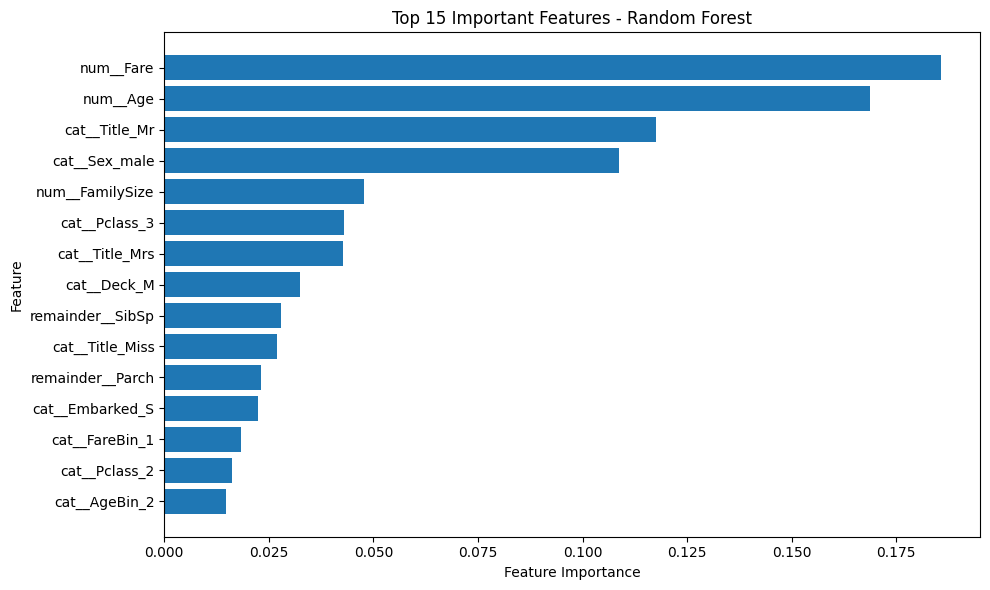

In [127]:
# Quan sát mô hình xếp hạng các đặc trưng có giá trị tương quan cao với biến mục tiêu
# Lấy tên các đặc trưng sau khi preprocessor xử lý
feature_names = preprocessor.get_feature_names_out()

# Lấy độ quan trọng đặc trưng từ mô hình

rf_clf = rf_pipe.fit(x_train, y_train)

rf_im = rf_clf.named_steps['classifier']

importances = rf_im.feature_importances_

# Tạo DataFrame để hiển thị
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Hiển thị top 15 đặc trưng quan trọng nhất
print(feature_importance_df.head(15))

# Trực quan hóa
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:15][::-1], feature_importance_df['Importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.show()

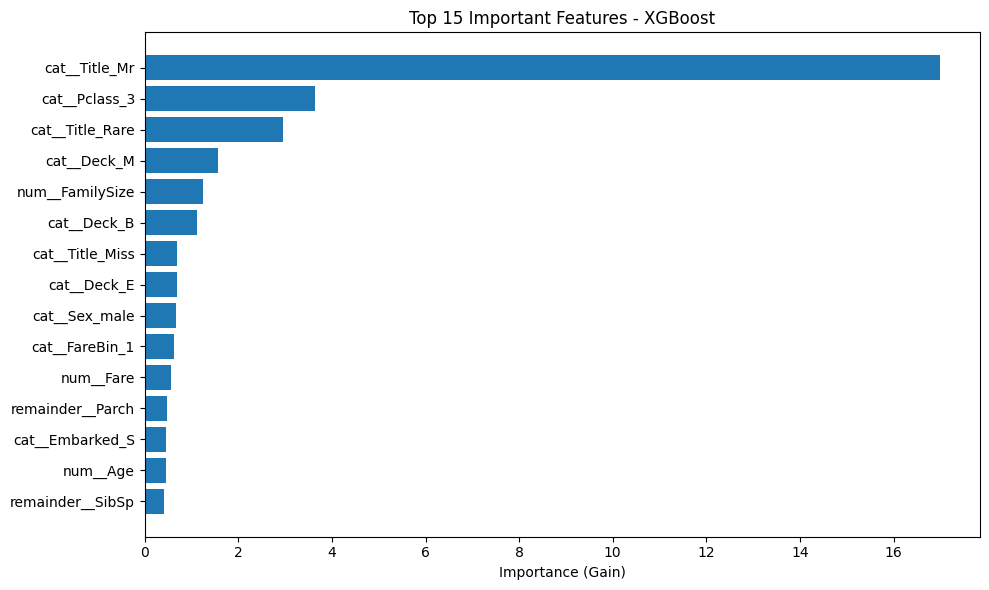

In [130]:
from xgboost import plot_importance

feature_names = xgb_pipe.named_steps['preprocessor'].get_feature_names_out()
# Lấy importance dưới dạng DataFrame
importance = xgb_im.get_booster().get_score(importance_type='gain')
xgb_clf = xgb_pipe.fit(x_train, y_train)
xgb_im = xgb_clf.named_steps['classifier']

# Gắn lại tên đặc trưng tương ứng
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': [importance.get(f"f{i}", 0) for i in range(len(feature_names))]
}).sort_values(by='Importance', ascending=False)

# Hiển thị top 15
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'][:15][::-1],
         importance_df['Importance'][:15][::-1])
plt.title("Top 15 Important Features - XGBoost")
plt.xlabel("Importance (Gain)")
plt.tight_layout()
plt.show()

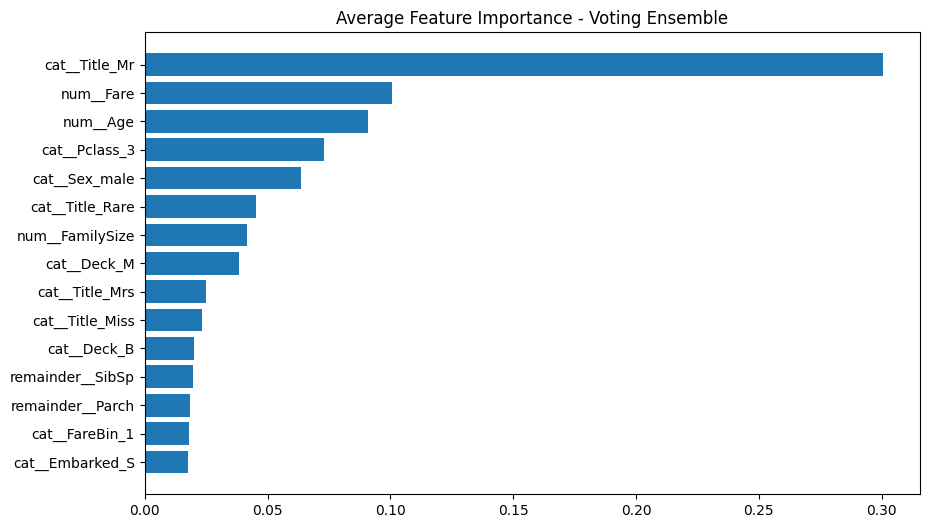

In [132]:
rf_importance = rf_im.feature_importances_
xgb_importance = xgb_im.feature_importances_

avg_importance = (rf_importance + xgb_importance) / 2

avg_df = pd.DataFrame({
    'Feature': feature_names,
    'Avg Importance': avg_importance
}).sort_values(by='Avg Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(avg_df['Feature'][:15][::-1], avg_df['Avg Importance'][:15][::-1])
plt.title("Average Feature Importance - Voting Ensemble")
plt.show()

### **VI. Xuất file và submit kết quả**

In [163]:
from sklearn.impute import KNNImputer

def preprocessing(train_df):

    imputer = KNNImputer(n_neighbors=5, weights='distance') # Phân loại thành 5 nhóm và tính trọng số theo khoảng cách
    train_df['Age'] = imputer.fit_transform(train_df[['Age']])
    train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
    train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].mean())
    train_df['Cabin'] = train_df['Cabin'].fillna('Missing')
    # Tạo cột mới dựa theo name thể hiện chức danh của hành khách
    train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    train_df['Title'] = train_df['Title'].replace(['Mlle','Ms'],'Miss')
    train_df['Title'] = train_df['Title'].replace('Mme','Mrs')
    train_df['Title'] = train_df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    # Kết hợp cột SibSp và Parch để đánh giá mức độ sống sót
    train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
    train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
    # Tách cột Cabin thành chữ cái đầu để quan sát
    train_df['Deck'] = train_df['Cabin'].str[0] # Với M sẽ là "Missing"
    # Phân nhóm độ tuổi và mức thành giá vé
    train_df['FareBin'] = pd.qcut(train_df['Fare'], 4, labels=False)
    train_df['AgeBin'] = pd.cut(train_df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=False)
    train_df.head() # Kiểm tra lại bảng dữ liệu


    # Đổi kiểu dữ liệu của một số cột không đúng giá trị
    train_df['Pclass'] = train_df['Pclass'].astype('object')
    train_df['SibSp'] = train_df['SibSp'].astype('object')
    train_df['Parch'] = train_df['Parch'].astype('object')

In [164]:
preprocessing(test_df)

In [165]:
# Thực hiện xuất file test và Submit kết quả
# Lấy mô hình tốt nhất sau khi RandomizedSearchCV tìm ra
best_xgb_model = random_search_xgb.best_estimator_

# Dự đoán trên tập test
y_pred_xgb = best_xgb_model.predict(test_df)

In [166]:
# Tạo DataFrame kết quả
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred_xgb.astype(int)   # đảm bảo giá trị là 0/1
})

# Xuất file CSV
submission.to_csv('submission_xgb.csv', index=False)

print("File 'submission_xgb.csv' đã được tạo thành công!")
submission.head()


File 'submission_xgb.csv' đã được tạo thành công!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
